In [1]:
import sys
sys.path.append('..')

from baselines.gnn.trainer import Trainer

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
# trainer = Trainer()

In [3]:
# l = trainer.loader

In [4]:
# next(iter(l)).edge_index

In [ ]:
trainer = Trainer()
# trainer.load_model('temporal_gnn_30_10_100.pt')
trainer.train(subset=1, num_epochs=200)

MAE for 1 feature: 1.159767985343933
MAE for 2 feature: 3.6976518630981445
MAE for 3 feature: 0.043563783168792725
MAE for 4 feature: 0.9034788608551025
MAE for 5 feature: 0.9695987701416016
MAE for 6 feature: 5.1496645028237253e-05


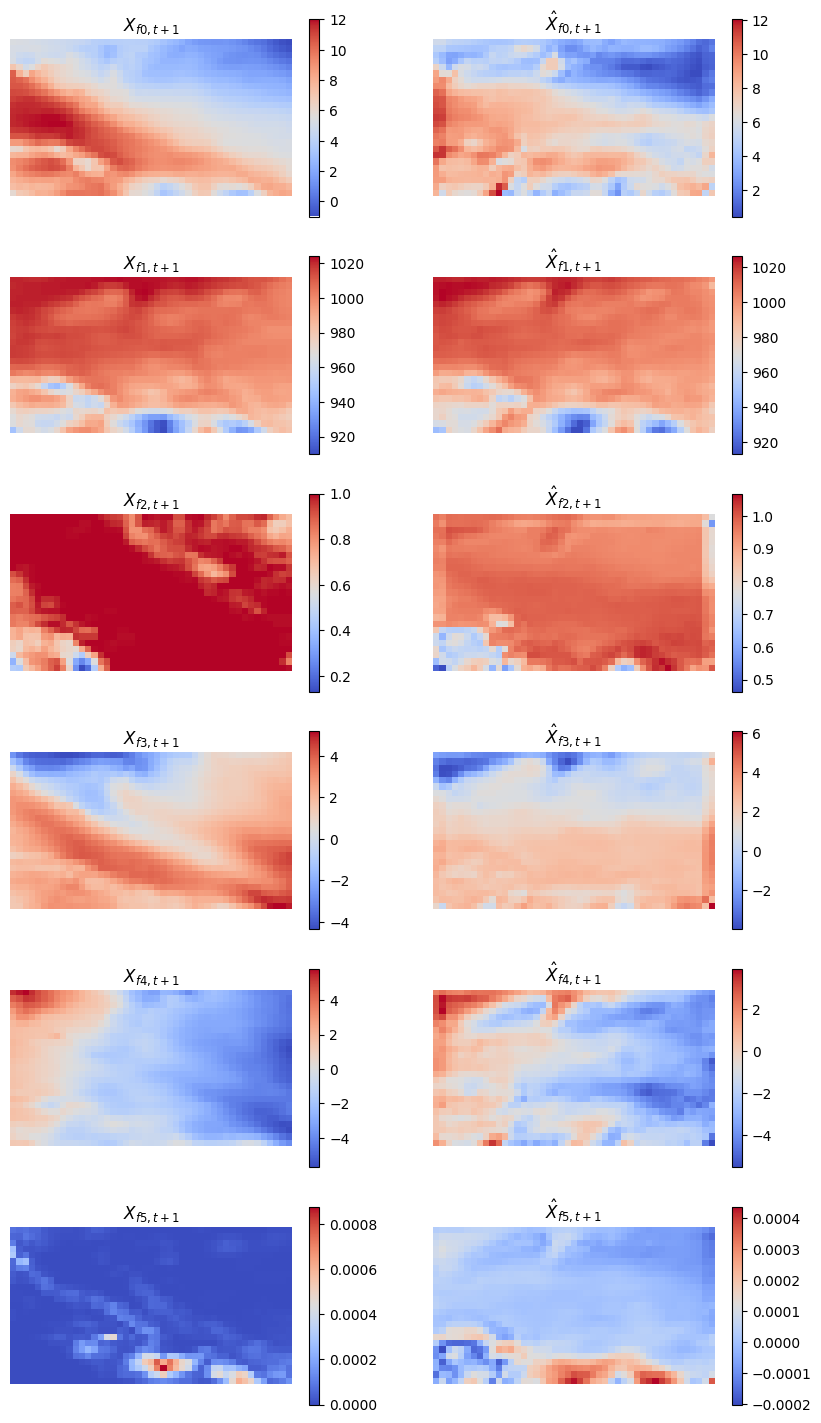

In [10]:
trainer.plot_predictions(type='train')

MAE for 1 feature: 4.602128028869629
MAE for 2 feature: 7.612918376922607
MAE for 3 feature: 0.21501287817955017
MAE for 4 feature: 1.9999603033065796
MAE for 5 feature: 1.969641089439392
MAE for 6 feature: 0.00014891594764776528


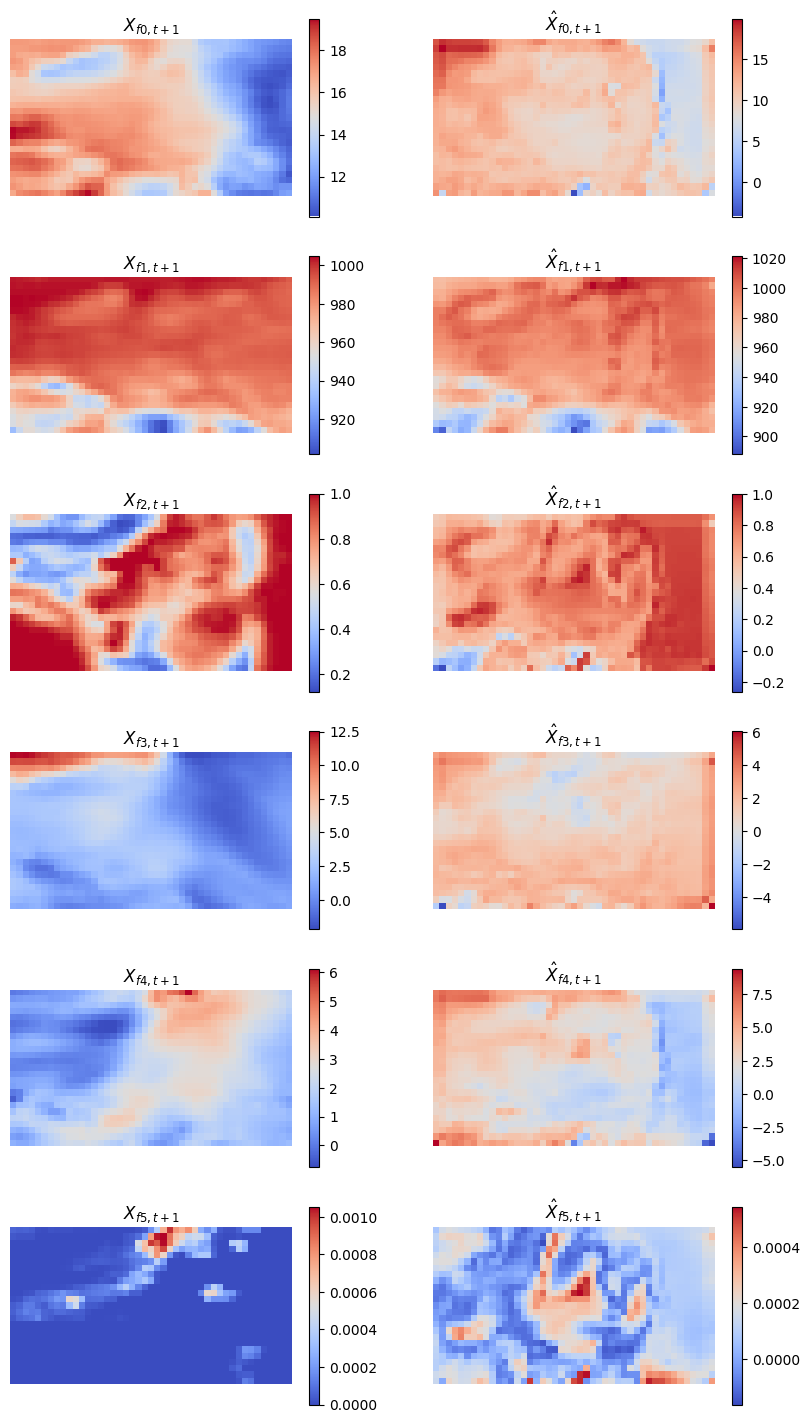

In [11]:
trainer.plot_predictions(type='test')

In [8]:
# import torch
# from torch_geometric.utils import to_undirected

# def node_index(i, j, num_cols):
#     return i * num_cols + j


# num_latitudes = 4
# num_longitudes = 3
# edge_index = []
# edge_weights = []
# for i in range(num_latitudes):
#     for j in range(num_longitudes):
#         if i > 0:
#             edge_index.append(
#                 [
#                     node_index(i, j, num_longitudes),
#                     node_index(i - 1, j, num_longitudes),
#                 ]
#             )
#             edge_index.append(
#                 [
#                     node_index(i - 1, j, num_longitudes),
#                     node_index(i, j, num_longitudes),
#                 ]
#             )
#             edge_weights.append([1,0])
#             edge_weights.append([-1,0])
            
#         if j > 0:
#             edge_index.append(
#                 [
#                     node_index(i, j, num_longitudes),
#                     node_index(i, j - 1, num_longitudes),
#                 ]
#             )
#             edge_index.append([
#                     node_index(i, j - 1, num_longitudes),
#                     node_index(i, j, num_longitudes),
#                 ]
#             )
#             edge_weights.append([0,1])
#             edge_weights.append([0,-1])

# edge_index = torch.tensor(edge_index, dtype=torch.long).t()
# edge_weights = torch.tensor(edge_weights, dtype=torch.long)